<a href="https://colab.research.google.com/github/abdulkerimosman/datascience/blob/main/LinearRegressionApplied.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ISLP

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

In [ ]:
auto = load_data('Auto')
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1


In [ ]:
y = auto['mpg']

design = MS(['horsepower'])
X = design.fit_transform(auto)

In [ ]:
model = sm.OLS(y,X)
result = model.fit()
summarize(result)

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           7.03e-81
Time:                        07:07:29   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
new_X = pd.DataFrame({
    'horsepower': [98]
})
new_X

,horsepower
0,98


Note: Here we try to find the confidence and prediction interval of teh predicted values, not of Beta values


In [ ]:
X_pred = design.fit_transform(new_X)
y_pred = result.get_prediction(X_pred)
y_pred.predicted_mean

array([24.46707715])

In [ ]:
y_pred.conf_int(alpha=0.05)

array([[23.97307896, 24.96107534]])

In [ ]:
y_pred.conf_int(obs=True, alpha=0.05)

array([[14.80939607, 34.12475823]])

<ipython-input-205-cbf921fcd4ea>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.axline((0,result.params[0]),slope=result.params[1],linestyle='--', color='r');


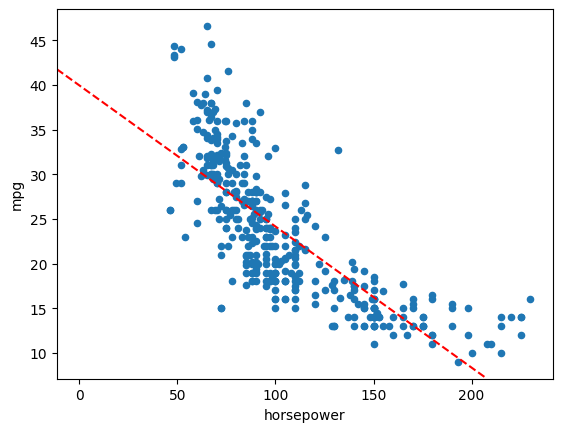

In [ ]:
ax = auto.plot.scatter('horsepower','mpg');
ax.axline((0,result.params[0]),slope=result.params[1],linestyle='--', color='r');

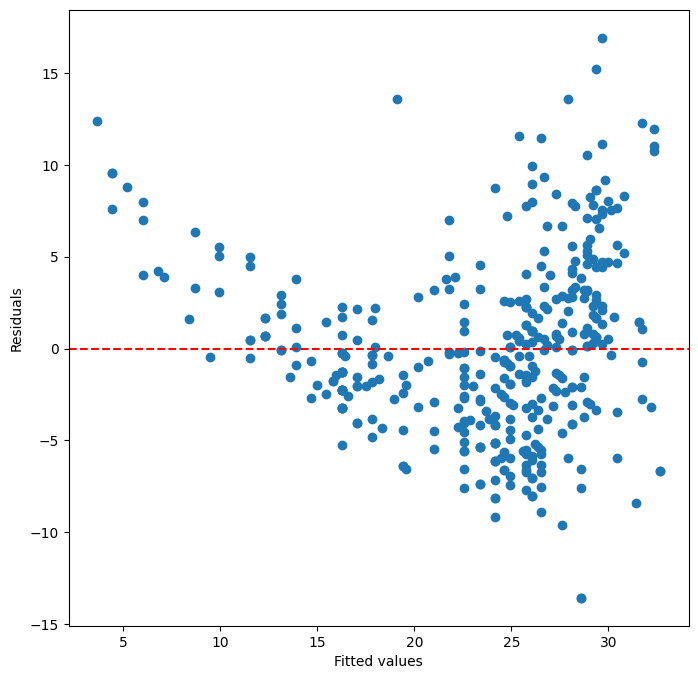

In [ ]:
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(result.fittedvalues,result.resid)
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
ax.axhline(y=0, color='r', linestyle='--')

115

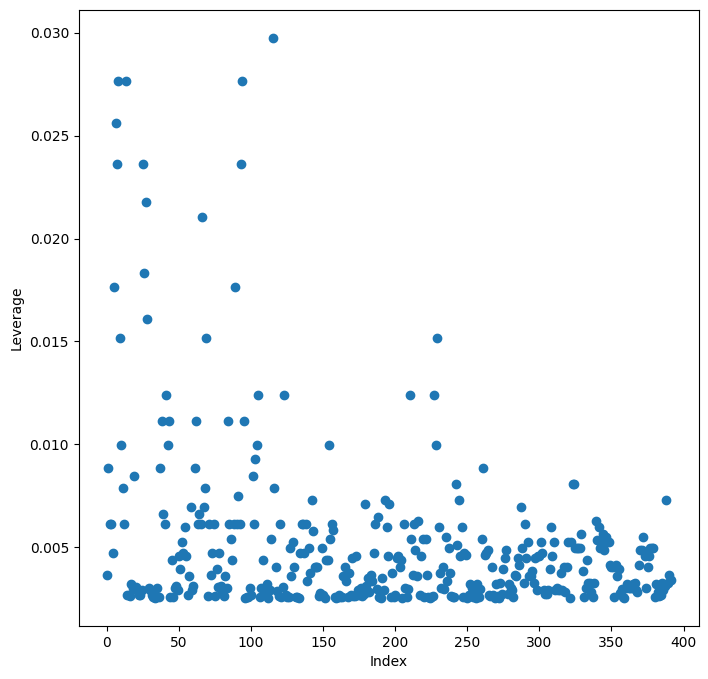

In [ ]:
infl = result.get_influence()
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]),infl.hat_matrix_diag) # hat_matrix_diag is used to get the leverage values
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

In [ ]:
auto.iloc[[115]]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
pontiac grand prix,16.0,8,400.0,230,4278,9.5,73,1


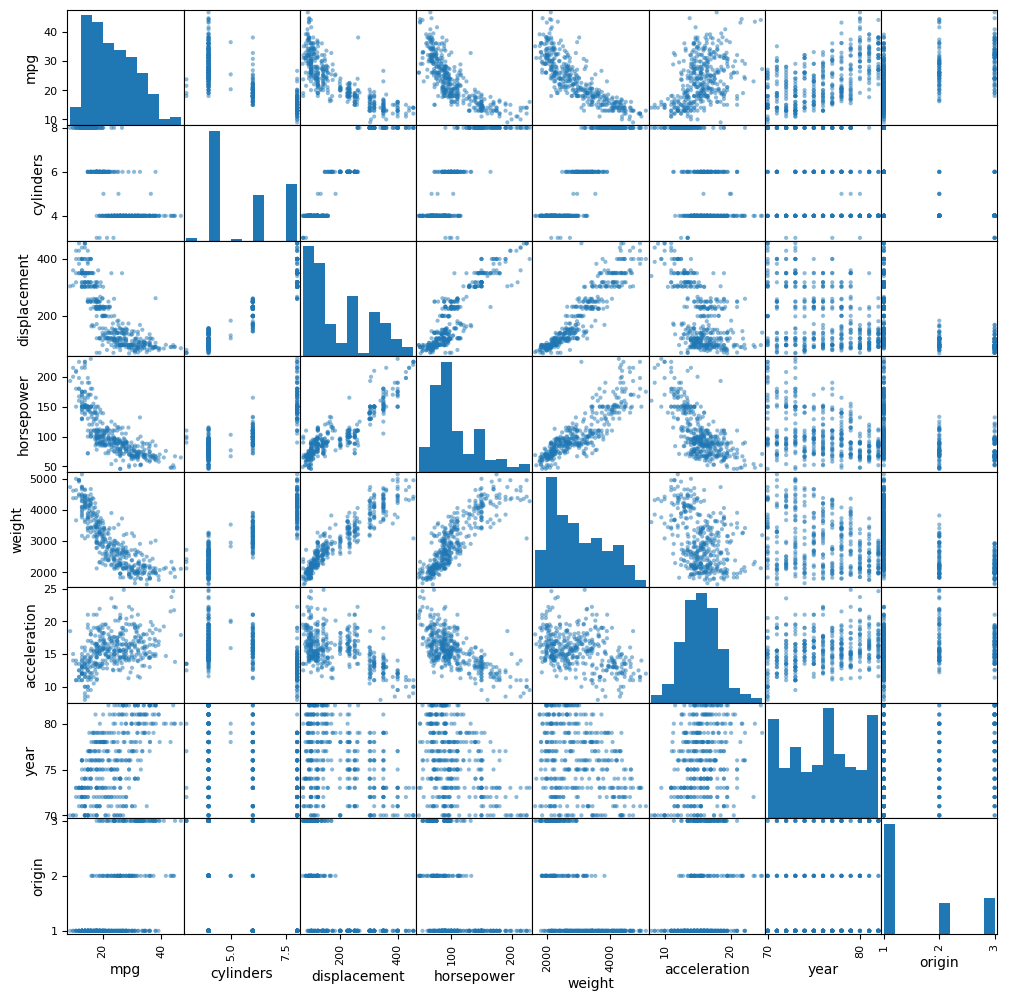

In [ ]:
pd.plotting.scatter_matrix(auto, figsize=(12,12));

In [ ]:
auto.drop(columns=['mpg']).corr()

,cylinders,displacement,horsepower,weight,acceleration,year,origin
cylinders,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [ ]:
columns = auto.drop(columns=['mpg']).columns
columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'year', 'origin'],
      dtype='object')

In [ ]:
design = MS(columns)
X_multi = design.fit_transform(auto)



In [ ]:
model = sm.OLS(y,X_multi).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Mon, 03 Feb 2025   Prob (F-statistic):          2.04e-139
Time:                        07:07:33   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

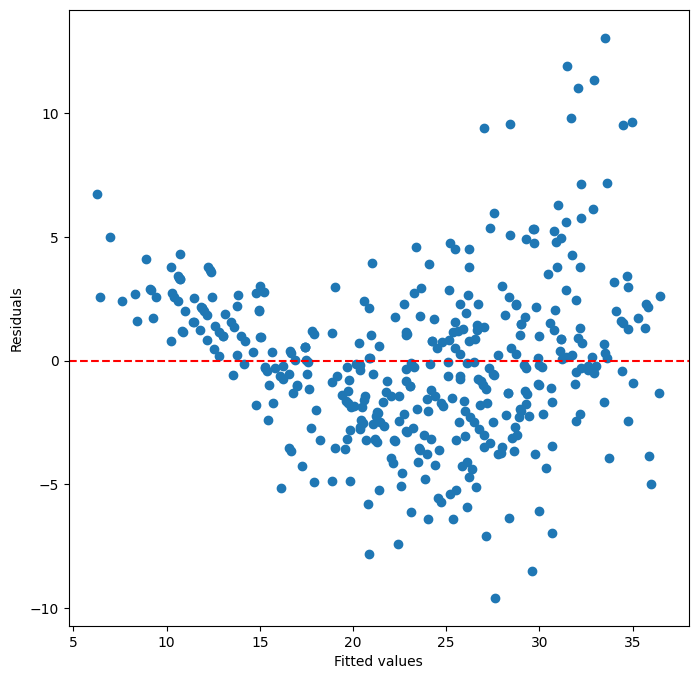

In [ ]:
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(model.fittedvalues,model.resid)
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
ax.axhline(y=0, color='r', linestyle='--')

13

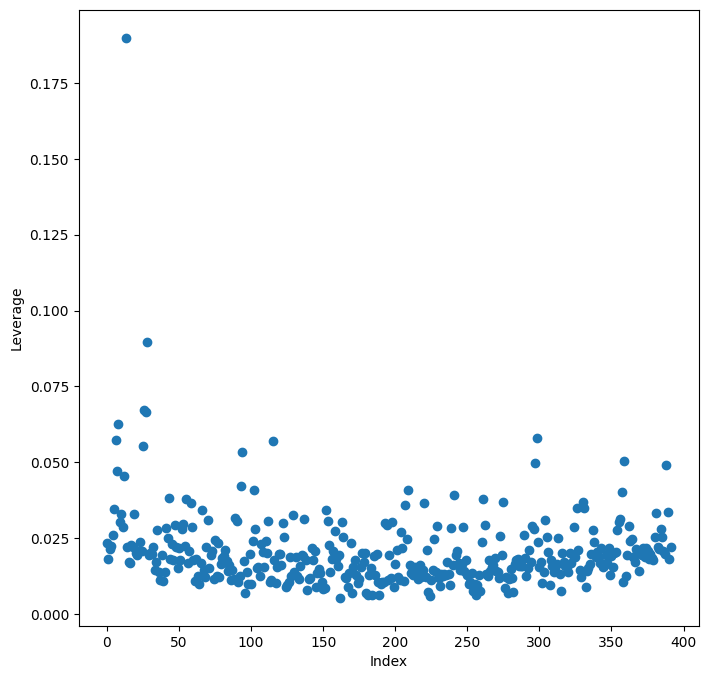

In [ ]:
inf = model.get_influence()

ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X_multi.shape[0]),inf.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(inf.hat_matrix_diag)

In [ ]:
X_multi.iloc[[13]]

,intercept,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
buick estate wagon (sw),1.0,8,455.0,225,3086,10.0,70,1


320

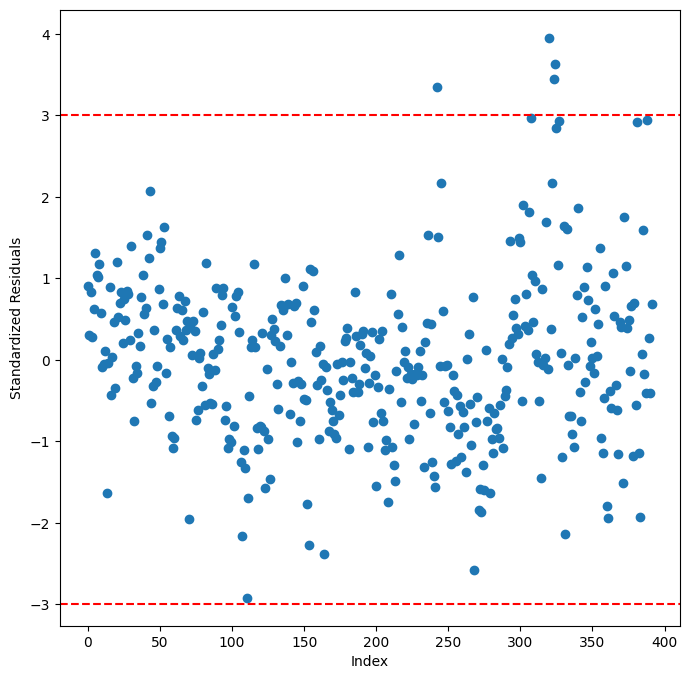

In [ ]:
inf = model.get_influence()

ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X_multi.shape[0]),inf.resid_studentized_internal)
ax.set_xlabel('Index')
ax.set_ylabel('Standardized Residuals')
ax.axhline(y=3, color='r', linestyle='--')
ax.axhline(y=-3, color='r', linestyle='--')
np.argmax(inf.resid_studentized_internal)

In [ ]:
np.arange(X_multi.shape[0])

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
variable = pd.DataFrame({
    'index' : np.arange(X_multi.shape[0]),
    'studentized residual': inf.resid_studentized_internal
    })

variable[variable['studentized residual']>3]
auto.iloc[[242,320,323,324]]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
volkswagen rabbit custom diesel,43.1,4,90.0,48,1985,21.5,78,2
mazda glc,46.6,4,86.0,65,2110,17.9,80,3
vw rabbit c (diesel),44.3,4,90.0,48,2085,21.7,80,2
vw dasher (diesel),43.4,4,90.0,48,2335,23.7,80,2


In [ ]:
auto_VIF = auto.drop(columns=['mpg'])
auto_VIF = sm.add_constant(auto_VIF)
auto_VIF

VIF = pd.DataFrame({
    'variables': auto_VIF.columns,
    'VIF': [variance_inflation_factor(auto_VIF.values, i) for i in range(auto_VIF.shape[1])]
})
VIF

,variables,VIF
0,const,763.557531
1,cylinders,10.737535
2,displacement,21.836792
3,horsepower,9.943693
4,weight,10.831260
5,acceleration,2.625806
6,year,1.244952
7,origin,1.772386


In [ ]:
auto_VIF = auto.drop(columns=['mpg','cylinders'])
auto_VIF = sm.add_constant(auto_VIF)
auto_VIF

VIF = pd.DataFrame({
    'variables': auto_VIF.columns,
    'VIF': [variance_inflation_factor(auto_VIF.values, i) for i in range(auto_VIF.shape[1])]
})
VIF

,variables,VIF
0,const,739.643376
1,displacement,12.218910
2,horsepower,9.794551
3,weight,10.655778
4,acceleration,2.619109
5,year,1.244663
6,origin,1.755139


In [ ]:
auto_VIF.drop(columns=['const'], inplace=True)


In [ ]:
auto_VIF = auto_VIF.drop(auto_VIF.index[[13, 242, 320, 323, 324]])
auto_VIF

,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,
chevrolet chevelle malibu,307.0,130,3504,12.0,70,1
buick skylark 320,350.0,165,3693,11.5,70,1
plymouth satellite,318.0,150,3436,11.0,70,1
amc rebel sst,304.0,150,3433,12.0,70,1
ford torino,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...
ford mustang gl,140.0,86,2790,15.6,82,1
vw pickup,97.0,52,2130,24.6,82,2
dodge rampage,135.0,84,2295,11.6,82,1


In [ ]:
columns= auto_VIF.columns
columns

Index(['displacement', 'horsepower', 'weight', 'acceleration', 'year',
       'origin'],
      dtype='object')

In [ ]:
design2 = MS(columns)
design2 = design2.fit_transform(auto_VIF)
design2

,intercept,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,
chevrolet chevelle malibu,1.0,307.0,130,3504,12.0,70,1
buick skylark 320,1.0,350.0,165,3693,11.5,70,1
plymouth satellite,1.0,318.0,150,3436,11.0,70,1
amc rebel sst,1.0,304.0,150,3433,12.0,70,1
ford torino,1.0,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...
ford mustang gl,1.0,140.0,86,2790,15.6,82,1
vw pickup,1.0,97.0,52,2130,24.6,82,2
dodge rampage,1.0,135.0,84,2295,11.6,82,1


In [ ]:
y = y.drop(y.index[[13, 242, 320, 323, 324]])
y

,mpg
name,
chevrolet chevelle malibu,18.0
buick skylark 320,15.0
plymouth satellite,18.0
amc rebel sst,16.0
ford torino,17.0
...,...
ford mustang gl,27.0
vw pickup,44.0
dodge rampage,32.0


In [ ]:
model2 = sm.OLS(y,design2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     314.8
Date:                Mon, 03 Feb 2025   Prob (F-statistic):          7.50e-144
Time:                        07:07:34   Log-Likelihood:                -982.03
No. Observations:                 386   AIC:                             1978.
Df Residuals:                     379   BIC:                             2006.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      -15.4627      4.329     -3.572      0.000     -23.974      -6.952
displacement     0.0106      0.005      1.948      0.052   -9.95e-05       0.021
horsepower      -0.0119      0.013     -0.900      0.369      -0.038       0.014
weight          -0.0066      0.001     -9.958      0.000      -0.008      -0.005
acceleration    -0.0086      0.096     -0.089      0.929      -0.198       0.181
year             0.7334      0.048     15.306      0.000       0.639       0.828
origin           1.2543      0.260      4.833      0.000       0.744       1.765
==============================================================================
Omnibus:                       10.590   Durbin-Watson:                   1.338
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               14.615
Skew:                           0.228   Prob(JB):                     0.000670
Kurtosis:                       3.837   Cond. No.                     8.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
summarize(model)

,coef,std err,t,P>|t|
intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


In [ ]:
summarize(model2)

,coef,std err,t,P>|t|
intercept,-15.4627,4.329,-3.572,0.000
displacement,0.0106,0.005,1.948,0.052
horsepower,-0.0119,0.013,-0.900,0.369
weight,-0.0066,0.001,-9.958,0.000
acceleration,-0.0086,0.096,-0.089,0.929
year,0.7334,0.048,15.306,0.000
origin,1.2543,0.260,4.833,0.000


In [ ]:
auto_VIF2 = auto_VIF.drop(columns=['acceleration'])
auto_VIF2 = sm.add_constant(auto_VIF2)
auto_VIF2

VIF2 = pd.DataFrame({
    'variables': auto_VIF2.columns,
    'VIF': [variance_inflation_factor(auto_VIF2.values, i) for i in range(auto_VIF2.shape[1])]
})
VIF2

,variables,VIF
0,const,595.656842
1,displacement,11.991959
2,horsepower,6.008761
3,weight,9.120238
4,year,1.225300
5,origin,1.745068


In [ ]:
columns2= auto_VIF2.drop(columns=['const']).columns
columns2

Index(['displacement', 'horsepower', 'weight', 'year', 'origin'], dtype='object')

In [ ]:
design3 = MS(columns2)
design3 = design3.fit_transform(auto_VIF2)
design3

,intercept,displacement,horsepower,weight,year,origin
name,,,,,,
chevrolet chevelle malibu,1.0,307.0,130,3504,70,1
buick skylark 320,1.0,350.0,165,3693,70,1
plymouth satellite,1.0,318.0,150,3436,70,1
amc rebel sst,1.0,304.0,150,3433,70,1
ford torino,1.0,302.0,140,3449,70,1
...,...,...,...,...,...,...
ford mustang gl,1.0,140.0,86,2790,82,1
vw pickup,1.0,97.0,52,2130,82,2
dodge rampage,1.0,135.0,84,2295,82,1


In [ ]:
model3 = sm.OLS(y,design3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     378.7
Date:                Mon, 03 Feb 2025   Prob (F-statistic):          3.68e-145
Time:                        07:07:34   Log-Likelihood:                -982.03
No. Observations:                 386   AIC:                             1976.
Df Residuals:                     380   BIC:                             2000.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      -15.6373      3.857     -4.054      0.000     -23.221      -8.053
displacement     0.0107      0.005      2.030      0.043       0.000       0.021
horsepower      -0.0112      0.010     -1.092      0.276      -0.031       0.009
weight          -0.0066      0.001    -11.737      0.000      -0.008      -0.006
year             0.7338      0.048     15.408      0.000       0.640       0.827
origin           1.2544      0.259      4.840      0.000       0.745       1.764
==============================================================================
Omnibus:                       10.486   Durbin-Watson:                   1.338
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               14.410
Skew:                           0.227   Prob(JB):                     0.000743
Kurtosis:                       3.830   Cond. No.                     7.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
auto_VIF2.drop(columns=['horsepower'], inplace=True)
auto_VIF2

,const,displacement,weight,year,origin
name,,,,,
chevrolet chevelle malibu,1.0,307.0,3504,70,1
buick skylark 320,1.0,350.0,3693,70,1
plymouth satellite,1.0,318.0,3436,70,1
amc rebel sst,1.0,304.0,3433,70,1
ford torino,1.0,302.0,3449,70,1
...,...,...,...,...,...
ford mustang gl,1.0,140.0,2790,82,1
vw pickup,1.0,97.0,2130,82,2
dodge rampage,1.0,135.0,2295,82,1


In [ ]:
VIF3 = pd.DataFrame({
    'variables': auto_VIF2.columns,
    'VIF': [variance_inflation_factor(auto_VIF2.values, i) for i in range(auto_VIF2.shape[1])]
})
VIF3


,variables,VIF
0,const,567.303333
1,displacement,9.423187
2,weight,8.516070
3,year,1.166608
4,origin,1.606885


In [ ]:
column_names = auto_VIF2.drop(columns=['const']).columns
predictors = MS(column_names).fit_transform(auto_VIF2)
predictors

,intercept,displacement,weight,year,origin
name,,,,,
chevrolet chevelle malibu,1.0,307.0,3504,70,1
buick skylark 320,1.0,350.0,3693,70,1
plymouth satellite,1.0,318.0,3436,70,1
amc rebel sst,1.0,304.0,3433,70,1
ford torino,1.0,302.0,3449,70,1
...,...,...,...,...,...
ford mustang gl,1.0,140.0,2790,82,1
vw pickup,1.0,97.0,2130,82,2
dodge rampage,1.0,135.0,2295,82,1


In [ ]:
sm.OLS(y,predictors).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     472.9
Date:                Mon, 03 Feb 2025   Prob (F-statistic):          2.88e-146
Time:                        07:07:35   Log-Likelihood:                -982.64
No. Observations:                 386   AIC:                             1975.
Df Residuals:                     381   BIC:                             1995.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      -16.5563      3.765     -4.397      0.000     -23.959      -9.153
displacement     0.0081      0.005      1.720      0.086      -0.001       0.017
weight          -0.0068      0.001    -12.434      0.000      -0.008      -0.006
year             0.7452      0.046     16.032      0.000       0.654       0.837
origin           1.1747      0.249      4.722      0.000       0.686       1.664
==============================================================================
Omnibus:                       11.387   Durbin-Watson:                   1.330
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               16.839
Skew:                           0.219   Prob(JB):                     0.000221
Kurtosis:                       3.924   Cond. No.                     7.41e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
auto_VIF2.drop(columns=['displacement'], inplace=True)
auto_VIF2

,const,weight,year,origin
name,,,,
chevrolet chevelle malibu,1.0,3504,70,1
buick skylark 320,1.0,3693,70,1
plymouth satellite,1.0,3436,70,1
amc rebel sst,1.0,3433,70,1
ford torino,1.0,3449,70,1
...,...,...,...,...
ford mustang gl,1.0,2790,82,1
vw pickup,1.0,2130,82,2
dodge rampage,1.0,2295,82,1


In [ ]:
last = auto_VIF2.drop(columns=['const']).columns
pred_last = MS(last).fit_transform(auto_VIF2)
pred_last

,intercept,weight,year,origin
name,,,,
chevrolet chevelle malibu,1.0,3504,70,1
buick skylark 320,1.0,3693,70,1
plymouth satellite,1.0,3436,70,1
amc rebel sst,1.0,3433,70,1
ford torino,1.0,3449,70,1
...,...,...,...,...
ford mustang gl,1.0,2790,82,1
vw pickup,1.0,2130,82,2
dodge rampage,1.0,2295,82,1


In [ ]:
sm.OLS(y,pred_last).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     626.3
Date:                Mon, 03 Feb 2025   Prob (F-statistic):          4.61e-147
Time:                        07:07:35   Log-Likelihood:                -984.13
No. Observations:                 386   AIC:                             1976.
Df Residuals:                     382   BIC:                             1992.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -15.9421      3.758     -4.242      0.000     -23.331      -8.554
weight        -0.0059      0.000    -24.898      0.000      -0.006      -0.005
year           0.7268      0.045     16.027      0.000       0.638       0.816
origin         1.0708      0.242      4.426      0.000       0.595       1.546
==============================================================================
Omnibus:                       12.796   Durbin-Watson:                   1.311
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               19.233
Skew:                           0.245   Prob(JB):                     6.66e-05
Kurtosis:                       3.977   Cond. No.                     7.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
auto_VIF2['mpg'] = y
auto_VIF2

,weight,year,origin,mpg
name,,,,
chevrolet chevelle malibu,3504,70,1,18.0
buick skylark 320,3693,70,1,15.0
plymouth satellite,3436,70,1,18.0
amc rebel sst,3433,70,1,16.0
ford torino,3449,70,1,17.0
...,...,...,...,...
ford mustang gl,2790,82,1,27.0
vw pickup,2130,82,2,44.0
dodge rampage,2295,82,1,32.0


In [ ]:
formula = "mpg ~ weight + year + origin + weight:year + weight:origin"
final_model = smf.ols(formula, data=auto_VIF2).fit()
summarize(final_model)

,coef,std err,t,P>|t|
Intercept,-95.3231,11.948000,-7.978,0.000
weight,0.0222,0.004000,5.409,0.000
year,1.7429,0.162000,10.732,0.000
origin,4.1067,1.068000,3.845,0.000
weight:year,-0.0004,0.000056,-6.318,0.000
weight:origin,-0.0014,0.000000,-3.116,0.002


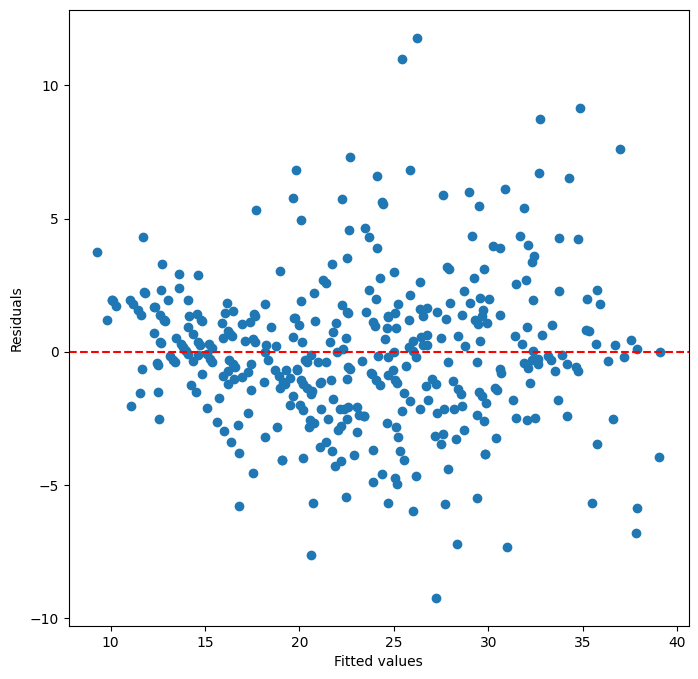

In [ ]:
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(final_model.fittedvalues,final_model.resid)
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
ax.axhline(y=0, color='r', linestyle='--')

In [ ]:
auto_VIF2 = sm.add_constant(auto_VIF2)
auto_VIF2

VIF2 = pd.DataFrame({
    'variables': auto_VIF2.columns,
    'VIF': [variance_inflation_factor(auto_VIF2.values, i) for i in range(auto_VIF2.shape[1])]
})
VIF2


,variables,VIF
0,const,588.686380
1,weight,4.248183
2,year,1.847655
3,origin,1.589541
4,mpg,5.918369


In [ ]:
a